In [1]:
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from scipy import ndimage, misc
from scipy.ndimage.interpolation import shift
import os

%run ./variables.ipynb
%run ./utils.ipynb
%run ../utils/data_utils.ipynb
%run ../utils/image_utils.ipynb

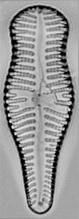

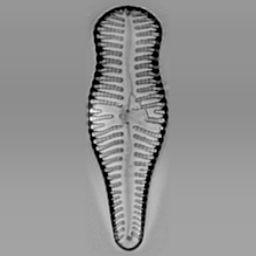

True

In [2]:
ref = cv2.imread("/mnt/nvme-storage/pfauregi/datasets/atlas/ref_img.png", cv2.IMREAD_GRAYSCALE)
ref_square = convert_to_square(ref, new_size=256).astype("uint8")
display(Image.fromarray(ref))
display(Image.fromarray(ref_square))
cv2.imwrite(os.path.join(OUTPUT_TMP, "to_square_1.png"), ref)
cv2.imwrite(os.path.join(OUTPUT_TMP, "to_square_2.png"), ref_square)

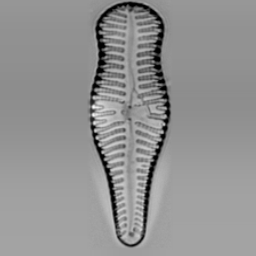

In [3]:
ox, oy = np.random.randint(-30,30,2)/100
img = tf.keras.preprocessing.image.random_shift(ref_square, ox, oy, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')
display(Image.fromarray(img))

In [4]:
def preproc(img):
    # Zoom img
    zoomed_img=cv2_clipped_zoom(img, np.random.uniform(80,120)/100)
    # Shift img
    ox, oy = np.random.randint(-30,30,2)/100
    return tf.keras.preprocessing.image.random_shift(zoomed_img, ox, oy, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest')

datagen = ImageDataGenerator(rescale=1./255.,
                         rotation_range=180, 
                         brightness_range=[0.8,1.2],
                         horizontal_flip=True, 
                         vertical_flip=True,
                         fill_mode='nearest',
                         #width_shift_range=30,
                         #height_shift_range=30,
                         #zoom_range=(0.8,1.2),
                         preprocessing_function=preproc,
                         data_format="channels_last")

x=[]
x.append(ref_square)
x = np.array(x)
flow = datagen.flow(x, batch_size=9)

In [5]:
i = 0
stop = True
result = []
for batch in flow:
    image = (batch[0,:,:,:]*255).astype('uint8')
    #display(Image.fromarray(image))
    result.append(image)
    i+=1
    if i>8:
        break
result = np.array(result)

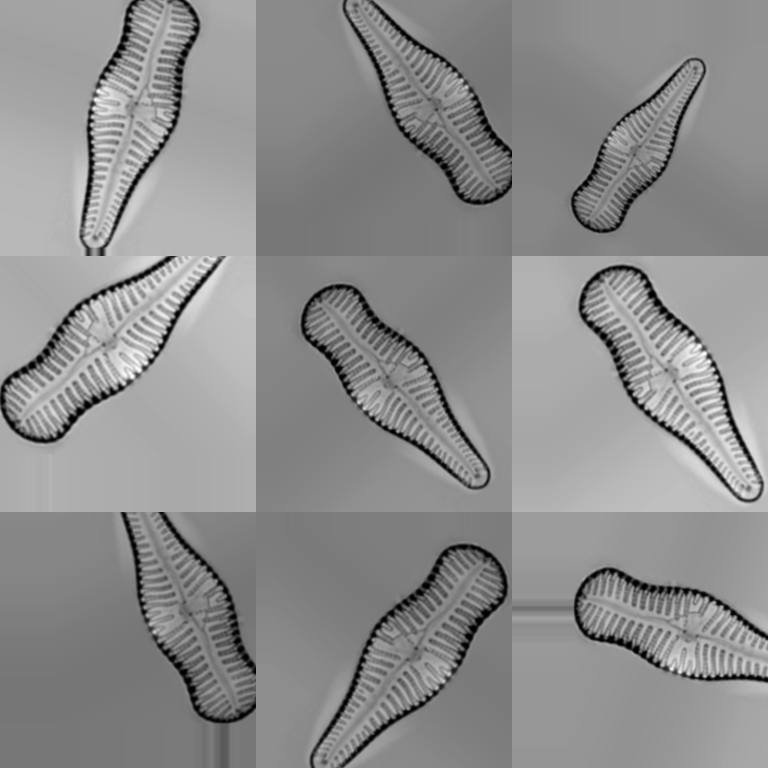

In [6]:
stack01 = np.hstack((result[0,:,:,:], result[1,:,:,:], result[2,:,:,:]))
stack02 = np.hstack((result[3,:,:,:], result[4,:,:,:], result[5,:,:,:]))
stack03 = np.hstack((result[6,:,:,:], result[7,:,:,:], result[8,:,:,:]))
grid = np.vstack((stack01, stack02, stack03))
display(Image.fromarray(grid))


In [ ]:
cv2.imwrite(os.path.join(OUTPUT_TMP, "bonjour.png"), grid)